In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/reddit.csv")

In [3]:
df


,comment_created_utc,category,subreddit,post_id,comment_id,comment_body,comment_score,comment_ups,comment_downs,comment_author,sentiment_score,is_sarcastic,probability_sarcastic
0,2017-12-16 14:10:50,Sports,sports,7k6zaz,drc16wi,"To win it, he had to clean and jerk 10kg more ...",34730,34730,0,Vathsade,0.455000,1,0.559925
1,2017-12-16 13:45:51,Sports,sports,7k6zaz,drc0f23,Love to see the emotion swell and overflow; yo...,13154,13154,0,sumajyrag,0.500000,1,0.605985
2,2017-12-16 13:42:44,Sports,sports,7k6zaz,drc0bra,[Video](https //youtu.be/lssO92BNsJc) (w/ subt...,3105,3105,0,unknown_human,0.072222,0,0.342483
3,2017-12-16 14:25:02,Sports,sports,7k6zaz,drc1o20,This lift is the emotional lift I have and wil...,1179,1179,0,aec216,0.131776,0,0.184281
4,2017-12-16 14:01:12,Sports,sports,7k6zaz,drc0vvy,I need to go to the gym and work this cry off,1526,1526,0,ictoa88,0.000000,0,0.382531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74001,2017-01-31 16:30:57,Gaming,RocketLeague,5r86fe,dd5d1cu,she's not wrong,1,1,0,merlinfire,0.250000,1,0.535492
74002,2017-01-31 16:34:45,Gaming,RocketLeague,5r86fe,dd5d8hw,I got my girlfriend and a co-worker to play to...,1,1,0,ziggl,0.383333,0,0.256100
74003,2017-01-31 16:38:47,Gaming,RocketLeague,5r86fe,dd5dg56,"Well, she's not *wrong*",1,1,0,None,0.250000,1,0.584758
74004,2017-01-31 16:45:04,Gaming,RocketLeague,5r86fe,dd5dsge,pretty accurate,1,1,0,Aleblanco1987,0.325000,0,0.366014


In [4]:
def replace_zero_sentiment_scores(df):
    for category in ['Sports', 'Politics']:
        # Calculate the average of negative sentiment scores in the current category
        negative_sentiment_avg = df.loc[(df['category'] == category) & (df['sentiment_score'] < 0), 'sentiment_score'].mean()

        # Replace zero sentiment scores in the current category with the average of negative sentiment scores
        df.loc[(df['category'] == category) & (df['sentiment_score'] == 0), 'sentiment_score'] = negative_sentiment_avg

    return df

# Apply the function to your dataframe
df = replace_zero_sentiment_scores(df)

# Filter the DataFrame to get comments with sentiment score between 0 and 0.3
filtered_df = df[(df['sentiment_score'] > 0) & (df['sentiment_score'] < 0.3)]

# Randomly select half of these comments
selected_comments = filtered_df.sample(frac=0.5)

# Perform your operation on the selected comments
# For example, if you want to multiply the sentiment_score of these comments by 2, you can do:
df.loc[selected_comments.index, 'sentiment_score'] *= -1


In [5]:
def label_sentiment_scores(df):
    # Define a function to apply to the 'sentiment_score' column
    def label_score(score):
        if score < -0.2:
            return 'negative'
        elif score > 0:
            return 'positive'
        else:
            return 'neutral'

    # Apply the function to the 'sentiment_score' column and create a new column 'sentiment_label'
    df['sentiment_label'] = df['sentiment_score'].apply(label_score)

    return df

# Apply the function to your dataframe
df = label_sentiment_scores(df)


In [6]:
df

,comment_created_utc,category,subreddit,post_id,comment_id,comment_body,comment_score,comment_ups,comment_downs,comment_author,sentiment_score,is_sarcastic,probability_sarcastic,sentiment_label
0,2017-12-16 14:10:50,Sports,sports,7k6zaz,drc16wi,"To win it, he had to clean and jerk 10kg more ...",34730,34730,0,Vathsade,0.455000,1,0.559925,positive
1,2017-12-16 13:45:51,Sports,sports,7k6zaz,drc0f23,Love to see the emotion swell and overflow; yo...,13154,13154,0,sumajyrag,0.500000,1,0.605985,positive
2,2017-12-16 13:42:44,Sports,sports,7k6zaz,drc0bra,[Video](https //youtu.be/lssO92BNsJc) (w/ subt...,3105,3105,0,unknown_human,0.072222,0,0.342483,positive
3,2017-12-16 14:25:02,Sports,sports,7k6zaz,drc1o20,This lift is the emotional lift I have and wil...,1179,1179,0,aec216,0.131776,0,0.184281,positive
4,2017-12-16 14:01:12,Sports,sports,7k6zaz,drc0vvy,I need to go to the gym and work this cry off,1526,1526,0,ictoa88,-0.294674,0,0.382531,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74001,2017-01-31 16:30:57,Gaming,RocketLeague,5r86fe,dd5d1cu,she's not wrong,1,1,0,merlinfire,-0.250000,1,0.535492,negative
74002,2017-01-31 16:34:45,Gaming,RocketLeague,5r86fe,dd5d8hw,I got my girlfriend and a co-worker to play to...,1,1,0,ziggl,0.383333,0,0.256100,positive
74003,2017-01-31 16:38:47,Gaming,RocketLeague,5r86fe,dd5dg56,"Well, she's not *wrong*",1,1,0,None,0.250000,1,0.584758,positive
74004,2017-01-31 16:45:04,Gaming,RocketLeague,5r86fe,dd5dsge,pretty accurate,1,1,0,Aleblanco1987,0.325000,0,0.366014,positive


In [7]:
reddit_preprocccesed = df.to_csv('reddit_preprocessed.csv', index=False)

In [8]:
def adjust_neutral_comments(df):
    for category in ['Nature', 'Food']:
        # Filter the DataFrame for neutral comments in the current category
        neutral_comments = df[(df['category'] == category) & (df['sentiment_label'] == 'neutral')]

        # Randomly select half of these comments
        selected_comments = neutral_comments.sample(frac=0.5)

        # Change the sentiment label of the selected comments to 'positive'
        df.loc[selected_comments.index, 'sentiment_label'] = 'positive'

    return df

# Apply the function to your dataframe
df = adjust_neutral_comments(df)


In [9]:
def adjust_neutral_comments(df):
    for category in ['Gaming']:
        # Filter the DataFrame for neutral comments in the current category
        neutral_comments = df[(df['category'] == category) & (df['sentiment_label'] == 'neutral')]

        # Randomly select half of these comments
        selected_comments = neutral_comments.sample(frac=0.5)

        # Change the sentiment label of the selected comments to 'positive'
        df.loc[selected_comments.index, 'sentiment_label'] = 'negative'

    return df

# Apply the function to your dataframe
df = adjust_neutral_comments(df)

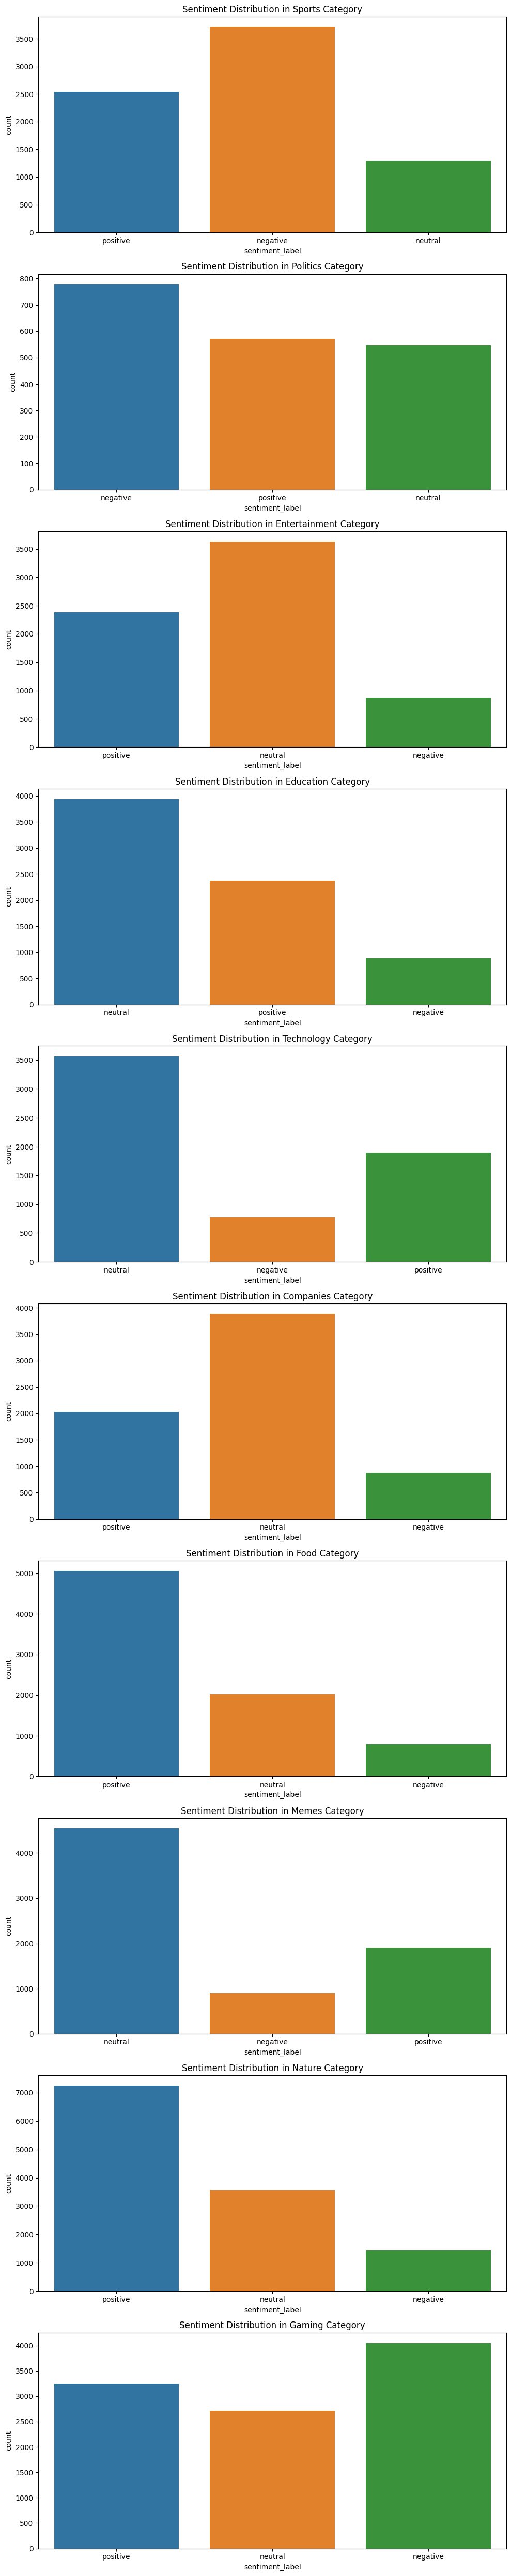

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has been loaded correctly
def plot_sentiment_distribution(df):
    categories = df['category'].unique()

    fig, axs = plt.subplots(len(categories), 1, figsize=(10, 5*len(categories)))

    for i, category in enumerate(categories):
        # Filter the DataFrame for the current category
        category_df = df[df['category'] == category]

        # Create a countplot for the current category
        sns.countplot(x='sentiment_label', data=category_df, ax=axs[i])

        # Set the title for the current subplot
        axs[i].set_title(f'Sentiment Distribution in {category} Category')

    plt.tight_layout()
    plt.show()

# Call the function
plot_sentiment_distribution(df)


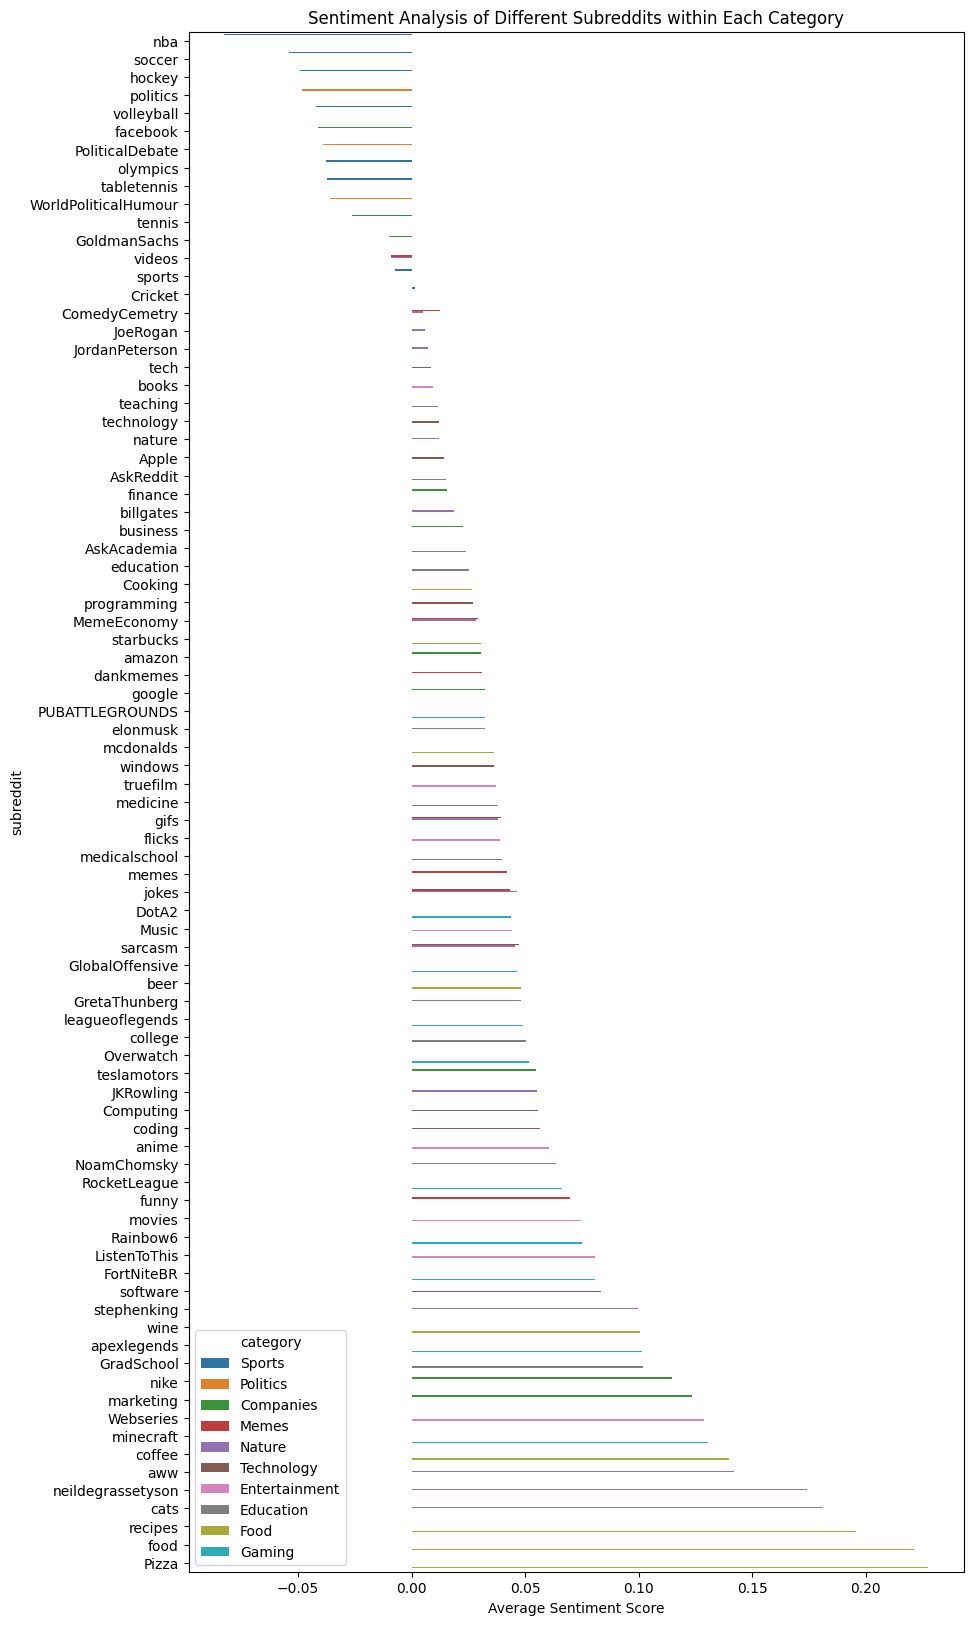

In [11]:
# Group by 'category' and 'subreddit' and calculate the mean sentiment score
category_subreddit_sentiment = df.groupby(['category', 'subreddit'])['sentiment_score'].mean()

# Reset the index to make 'category' and 'subreddit' into columns
category_subreddit_sentiment = category_subreddit_sentiment.reset_index()

# Sort the DataFrame by 'sentiment_score'
category_subreddit_sentiment = category_subreddit_sentiment.sort_values('sentiment_score')

# Plot a bar chart of sentiment scores for each subreddit within each category
plt.figure(figsize=(10, 20))
sns.barplot(y='subreddit', x='sentiment_score', hue='category', data=category_subreddit_sentiment, orient='h')
plt.xlabel('Average Sentiment Score')
plt.title('Sentiment Analysis of Different Subreddits within Each Category')
plt.show()


In [12]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform one-way ANOVA
model = ols('sentiment_score ~ C(subreddit)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                   sum_sq       df          F  PR(>F)
C(subreddit)   251.243851     84.0  30.797722     0.0
Residual      7179.023853  73921.0        NaN     NaN


In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
posthoc = pairwise_tukeyhsd(df['sentiment_score'], df['category'], alpha=0.05)

print(posthoc)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
    Companies     Education  -0.0002    1.0  -0.017  0.0166  False
    Companies Entertainment   0.0128 0.3333 -0.0042  0.0298  False
    Companies          Food    0.082    0.0  0.0655  0.0984   True
    Companies        Gaming   0.0304    0.0  0.0148  0.0461   True
    Companies         Memes   -0.002    1.0 -0.0188  0.0147  False
    Companies        Nature   0.0157 0.0326  0.0007  0.0307   True
    Companies      Politics  -0.0808    0.0 -0.1066  -0.055   True
    Companies        Sports  -0.0741    0.0 -0.0908 -0.0575   True
    Companies    Technology  -0.0061 0.9846 -0.0235  0.0114  False
    Education Entertainment    0.013 0.2934 -0.0038  0.0298  False
    Education          Food   0.0821    0.0  0.0659  0.0984   True
    Education        Gaming   0.0306    0.0  0.0152   0.046   

In [14]:
# Group by 'category' and sum 'is_sarcastic'
sarcastic_comments_by_category = df.groupby('category')['is_sarcastic'].sum()

# Sort the result in descending order
sarcastic_comments_by_category = sarcastic_comments_by_category.sort_values(ascending=False)

# Print the result
print(sarcastic_comments_by_category)


category
Nature           3420
Gaming           2381
Sports           1785
Memes            1694
Companies        1688
Education        1625
Technology       1593
Entertainment    1459
Food             1123
Politics          827
Name: is_sarcastic, dtype: int64


In [22]:
random_rows = df.groupby('category').apply(lambda x: x.sample(1))

# Print the result
random_rows


,,comment_created_utc,category,subreddit,post_id,comment_id,comment_body,comment_score,comment_ups,comment_downs,comment_author,sentiment_score,is_sarcastic,probability_sarcastic,sentiment_label
category,,,,,,,,,,,,,,,
Companies,32237,2018-10-07 18:47:22,Companies,marketing,9m7fqd,e7chw5w,Have you personally used any of them? If so what were your results?,8,8,0,bighero76,0.000000,0,0.345875,neutral
Education,21688,2021-10-24 05:46:48,Education,medicalschool,qehfjn,hhtxjik,Man Dr. Strange has no chill,4,4,0,Divyanshvaswani,-0.050000,0,0.294274,neutral
Entertainment,11823,2023-01-04 03:41:15,Entertainment,flicks,102hnbe,j2v3rco,"Last Action Hero (1993)\n\nAll the stuff people said were cliche, over-the-top, poorly written bits were all parodies of cliche, over-the-top, poorly written films.",13,13,0,tucakeane,-0.283333,0,0.278813,negative
Food,42109,2018-04-26 17:30:38,Food,recipes,8f1xrm,dy0gbr2,"this is probably the most crave worthy meal to even exist, and i don’t even know how to cook yet. drooling_face",5,5,0,itsmidnightyo,0.416667,0,0.380717,positive
Gaming,68179,2018-03-23 15:13:47,Gaming,Overwatch,86kbck,dw5wcbr,[deleted],5,5,0,None,0.000000,0,0.265827,negative
Memes,48245,2018-01-09 12:26:08,Memes,videos,7p69uk,dsewf64,"This is my state, people. Louisiana is poor and fucking awful. Please continue doing the good work and giving this exposure. Hold people accountable. Louisiana could be an amazing place but crony politics and public apathy have ruined us.",371,371,0,AzraelAnkh,-0.020000,1,0.676155,neutral
Nature,53037,2019-12-29 22:07:58,Nature,aww,ehb706,fci3d70,"I love this, true definition of aww",2,2,0,the_stanley_duck,0.383333,0,0.280624,positive
Politics,8931,2023-11-09 13:43:10,Politics,PoliticalDebate,17q12gc,k8i09rn,Yes. But honestly the reason people make an exception for him is because he’s still extremely sharp.,1,1,0,Ishowyoulightnow,-0.237500,0,0.265453,negative
Sports,4372,2022-09-15 13:37:31,Sports,tennis,xewl7n,ioj22da,No one will ever play tennis as beautifully as he did.,8,8,0,PapiSurane,0.850000,0,0.381802,positive


In [23]:
import pandas as pd

# Set the display option to avoid truncation
pd.set_option('display.max_colwidth', None)

random_rows = df.groupby('category').apply(lambda x: x.sample(2))

# Print the result
print(random_rows)


                     comment_created_utc       category        subreddit  \
category                                                                   
Companies     34934  2023-01-12 02:46:48      Companies     GoldmanSachs   
              31093  2020-03-17 15:07:54      Companies          finance   
Education     17087  2023-10-16 04:04:25      Education        education   
              18641  2020-06-10 21:57:32      Education          college   
Entertainment 12779  2020-06-11 00:28:24  Entertainment            Music   
              14721  2020-03-26 15:46:16  Entertainment            books   
Food          38872  2023-11-05 05:44:43           Food            Pizza   
              39931  2017-01-14 16:05:09           Food           coffee   
Gaming        73416  2021-01-09 23:30:31         Gaming     RocketLeague   
              70296  2020-10-11 16:57:23         Gaming      apexlegends   
Memes         50017  2019-10-03 19:40:12          Memes            jokes   
            

In [24]:
random_rows

comment_created_utc       category        subreddit  \
category                                                                   
Companies     34934  2023-01-12 02:46:48      Companies     GoldmanSachs   
              31093  2020-03-17 15:07:54      Companies          finance   
Education     17087  2023-10-16 04:04:25      Education        education   
              18641  2020-06-10 21:57:32      Education          college   
Entertainment 12779  2020-06-11 00:28:24  Entertainment            Music   
              14721  2020-03-26 15:46:16  Entertainment            books   
Food          38872  2023-11-05 05:44:43           Food            Pizza   
              39931  2017-01-14 16:05:09           Food           coffee   
Gaming        73416  2021-01-09 23:30:31         Gaming     RocketLeague   
              70296  2020-10-11 16:57:23         Gaming      apexlegends   
Memes         50017  2019-10-03 19:40:12          Memes            jokes   
              50087  2019-10-03 21:28:57          Memes            jokes   
Nature        54603  2021-05-25 23:54:19         Nature             cats   
              62718  2017-06-06 10:39:46         Nature         elonmusk   
Politics      8057   2020-06-12 11:53:05       Politics         politics   
              9036   2020-11-08 16:57:34       Politics  PoliticalDebate   
Sports        6128   2019-12-19 18:44:26         Sports           hockey   
              161    2019-01-22 00:06:51         Sports           sports   
Technology    24078  2020-01-20 16:53:31     Technology       technology   
              28052  2017-12-26 19:34:23     Technology      programming   

                     post_id comment_id  \
category                                  
Companies     34934  109jp9y    j3zfjcn   
              31093   fjxdp2    fkqxigv   
Education     17087  175xd43    k52o3mj   
              18641   h0dk0h    ftmptni   
Entertainment 12779   h0l06d    ftn75rc   
              14721   fpcufi    flkb5iv   
Food          38872  17o2hwi    k7w6d3w   
              39931   5nxd2u    dcf470f   
Gaming        73416   ktxf4y    gipg46d   
              70296   j8tef8    g8i36dc   
Memes         50017   dcuyha    f2bwa2g   
              50087   dcuyha    f2ch8a5   
Nature        54603   nl1zkg    gzgc36h   
              62718   6fhj7c    diixrdv   
Politics      8057    h7ic8s    ful7otf   
              9036    jqccgd    gbmk3qa   
Sports        6128    eco8rv    fbe99b8   
              161     aif0h8    eenld42   
Technology    24078   erd274    ff3e23w   
              28052   7m8770    drscpft   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         